# AI 534 Homework 3 {-}

Author: Tanner Wells

## Part 1: {-}

1. 
    <br>
    RSMLE is RSME but taking the difference between the log of 1+the data point and the log of 1+the model's prediciton. The mathematical definition is shown below. I found this definitions on stakc exchange and used it because it is well formatted. 

    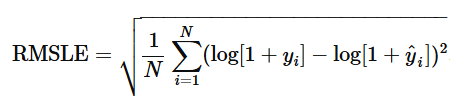

2. 
    <br>
    RSME takes the difference between the data point and the model prediciton, squares it, sums over all data points and divides by all data points. RSMLE is the exact same, except the difference is the log of (1+the datapoint) and the log of (1+the model prediciton).

3. 
    <br>
    This contest uses RSMLE to account for differences in errors between different levels of housing prices. For example, being off by $10,000 for a $50,000 house is a pretty significant error, but being off by $10,000 for a $5,000,000 is actually a pretty good guess. RSME treats these errors as exactly the same, but this is not desired behavior. Taking the log and then finding the difference solves this problem and allows for errors in predictions to be accounted for more equally for all house prices.

4. 
    <br>
    An RSMLE of .11 indicates that the average difference between the logs of the true and predicted housing prices is .11. This intuitively can be thought of as a sort of standard deviation, with a higher value indicating a higher standard error and a lower value being lower standard error. A value of 0 would be perfect predicions for all data points. 

5. 
    <br>
    As shown in the screenshot below, when I submitted the sample submission, my ranking was 5144 with a RSMLE of 0.40613.

    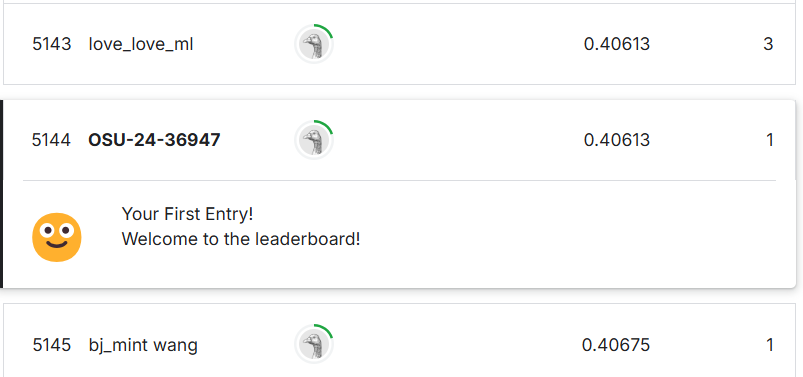

6. 
    <br>
    Working in the log output space solves the same problem described in question 3. When evaluating the fitness of a model, using the linear difference between a potential model and the actual data point would make more expensive housing have a higher weight in the fitness of a model. This is because small differences in predctions can be tens of thousands of dollars for expensive housing, whereas thens of thousands of dollars are large differences for less expensive housing. Working in the log space normalizes these differences and makes expensive and cheap housing errors carry the same weight in training models. 



## Part 2: {-}

1. 

In [835]:
#Imports
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import root_mean_squared_log_error
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
import math
from sklearn.preprocessing import MinMaxScaler



In [836]:
#Read data
data = pd.read_csv("my_train.csv")

#Convert to string


#Drop ID and SalePrice columns
data2 = data.drop(['Id','SalePrice'],axis=1)
data2 = data2.astype(str)
#Use HW1 method to binarize
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(data2)
binary_data = encoder.transform(data2)
print(binary_data.shape)


(1314, 7226)


According to the code output above, there are 7226 features when we binarize all fields for my_train.csv.

2. 

In [837]:
#Iterate over all categories
for i,type in enumerate(data2):
    features = len(encoder.categories_[i])
    print("Categories in field",type,"--", features)
    

Categories in field MSSubClass -- 15
Categories in field MSZoning -- 5
Categories in field LotFrontage -- 108
Categories in field LotArea -- 989
Categories in field Street -- 2
Categories in field Alley -- 3
Categories in field LotShape -- 4
Categories in field LandContour -- 4
Categories in field Utilities -- 2
Categories in field LotConfig -- 5
Categories in field LandSlope -- 3
Categories in field Neighborhood -- 25
Categories in field Condition1 -- 9
Categories in field Condition2 -- 8
Categories in field BldgType -- 5
Categories in field HouseStyle -- 8
Categories in field OverallQual -- 10
Categories in field OverallCond -- 9
Categories in field YearBuilt -- 110
Categories in field YearRemodAdd -- 61
Categories in field RoofStyle -- 6
Categories in field RoofMatl -- 8
Categories in field Exterior1st -- 15
Categories in field Exterior2nd -- 16
Categories in field MasVnrType -- 4
Categories in field MasVnrArea -- 305
Categories in field ExterQual -- 4
Categories in field ExterCond 

3. 

In [838]:
#Train on my_train
y_train = np.log(data['SalePrice'])
regr = LinearRegression()
regr.fit(binary_data,y_train)
#Test on my_dev
data_test = pd.read_csv("my_dev.csv")
data_test_2 = data_test.drop(['Id','SalePrice'],axis=1)
data_test_2 = data_test_2.astype(str)
binary_data_test = encoder.transform(data_test_2)
y_pred = regr.predict(binary_data_test)
y_test = np.log(data_test['SalePrice'])

#Not do RMSE, don't need to do log since already logged it
log_error_test = root_mean_squared_error(y_pred, y_test)
print("Root mean squared log error dev: %.4f" %log_error_test)


Root mean squared log error dev: 0.1518


4. 

In [839]:
#print("Coefficients: \n", regr.coef_)

#Sort the list of weights from largest to smallest
sorted_indices = np.argsort(regr.coef_)[::-1]
top_10_indices = sorted_indices[:10]
bottom_10_indices = sorted_indices[-10:]
top_10_values = regr.coef_[top_10_indices]
bottom_10_values = regr.coef_[bottom_10_indices][::-1]

#Now copy my code from earlier to iterate through features
#This is definitely not the best way to do this but oh well
#Set list of features and types to sort by index
feature_list_pos = []
type_list_pos = []
index_list_pos = []

Total = 0
for i,type in enumerate(data2):
    features = len(encoder.categories_[i])
    #print(type)
    for x, feature_num in enumerate(encoder.categories_[i]):
        #print(x)
        #print(feature_num)
        if Total in top_10_indices:
            #print("Feature {0} in {1}".format(feature_num,type))
            feature_list_pos.append(feature_num)
            type_list_pos.append(type)
            index_list_pos.append(Total)
        Total+=1

#Sort from largest value first because it makes sense
second_index_to_pos = {index: i for i, index in enumerate(index_list_pos)}
sorted_features_pos = [feature_list_pos[second_index_to_pos[idx]] for idx in top_10_indices]
sorted_types_pos = [type_list_pos[second_index_to_pos[idx]] for idx in top_10_indices]

#Now do negative values
feature_list_neg = []
type_list_neg = []
index_list_neg = []

Total = 0
for i,type in enumerate(data2):
    features = len(encoder.categories_[i])
    #print(type)
    for x, feature_num in enumerate(encoder.categories_[i]):
        #print(x)
        #print(feature_num)
        if Total in bottom_10_indices:
            #print("Feature {0} in {1}".format(feature_num,type))
            feature_list_neg.append(feature_num)
            type_list_neg.append(type)
            index_list_neg.append(Total)
        Total+=1

#Sort from largest value first because it makes sense
second_index_to_neg = {index: i for i, index in enumerate(index_list_neg)}
sorted_features_neg = [feature_list_neg[second_index_to_neg[idx]] for idx in bottom_10_indices]
sorted_types_neg = [type_list_neg[second_index_to_neg[idx]] for idx in bottom_10_indices]

print("Top ten most positive features:\n")
for n, value in enumerate(top_10_values):
    print("Feature {0} in {1} with weight {2:.4f}".format(sorted_features_pos[n],sorted_types_pos[n],value))

print("\n\nTop ten most negative features:\n")
for n, value in enumerate(bottom_10_values):
    print("Feature {0} in {1} with weight {2:.4f}".format(sorted_features_neg[n],sorted_types_neg[n],value))


Top ten most positive features:

Feature 9 in OverallQual with weight 0.1392
Feature 3 in FullBath with weight 0.1373
Feature StoneBr in Neighborhood with weight 0.1262
Feature 472 in 2ndFlrSF with weight 0.1155
Feature 8 in OverallQual with weight 0.1085
Feature WdShngl in RoofMatl with weight 0.0937
Feature 1192 in GrLivArea with weight 0.0935
Feature NoRidge in Neighborhood with weight 0.0871
Feature 3 in GarageCars with weight 0.0856
Feature Crawfor in Neighborhood with weight 0.0848


Top ten most negative features:

Feature 50 in BsmtFinSF1 with weight -0.1876
Feature 1 in OverallQual with weight -0.1271
Feature 1 in GarageCars with weight -0.1233
Feature 3 in OverallCond with weight -0.1163
Feature 8281 in LotArea with weight -0.1087
Feature 311 in BsmtFinSF2 with weight -0.1086
Feature 3 in OverallQual with weight -0.1023
Feature 236 in EnclosedPorch with weight -0.0933
Feature 968 in GrLivArea with weight -0.0888
Feature C (all) in MSZoning with weight -0.0867


5. 

In [840]:
print("Number of weights w/o intercept:",len(regr.coef_))
print("Calculated value for intercept: {0:.4f}".format(regr.intercept_))

Number of weights w/o intercept: 7226
Calculated value for intercept: 12.1357


As shown from the code output above, we do not need to add the bias dimension explicitly, as this is handled automatically and integrated into the intercept value. The calculated feature weight for the intercept has the same meaning as the feature weight for the bias dimension. In this case, it is 12.1357. It makes sense to have a large positive bias because we are fitting our data to housing prices, which have large positive prices. There are no houses with a negative or zero price. 

6. 
    <br>
    Intuitively, this bias represents the log value of a "baseline" house with features of zero for all data types. Based on the value of 12.1357, if we take e^12.1357, we get 186,409. From my interpretation, this represents that the "baseline" price of a house in our model is $186,409, which makes sense based on real-life housing prices. Different features can increase or decrease this value based ont he calculated wieghts, but all things held constantly at zero, the bias represents a reasonable baseline housing price.

7. 

In [841]:
#Now test on test.csv
data_test_kaggle = pd.read_csv("test.csv")
data_test_2_kaggle = data_test_kaggle.drop(['Id'],axis=1)
data_test_2_kaggle = data_test_2_kaggle.astype(str)
binary_data_test_kaggle = encoder.transform(data_test_2_kaggle)
y_pred_kaggle = regr.predict(binary_data_test_kaggle)


new_csv = data_test_kaggle
new_csv["SalePrice"] = np.exp(y_pred_kaggle)
final = new_csv[['Id','SalePrice']]
final.to_csv('test.predicted.csv',index=False)

As shown in th screenshot below, my score was .194 for Linear Regression. This ranks me 4430th on the leaderboard. 

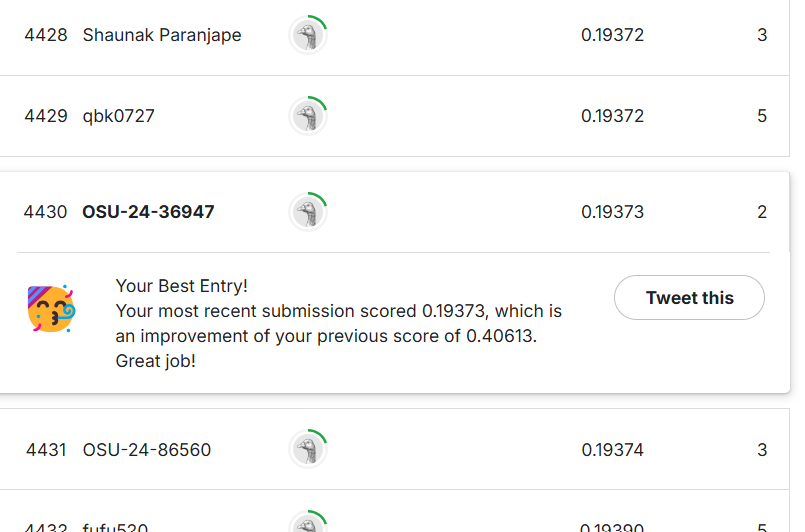

## Part 3: {-}

1. 
    <br>
    As discussed in the previous homework, naive binarization increases the number of features, which increases the trianing time and memory requirements. Also, basically all of the feautres for a certain data point will be zero when numerical data is binarized. This sparseness of data can lead to the regression model being less effective, as in linearization all the features have some impact on the final model. When there are so many features for one category of data, that category may be overrepresented in the model. Overall, we saw that in homework 1 naive binarization was much less effective than other forms of data representation. 

2. 
    <br>
    I made a few important decisions before implementing smart binarization. First, I chose to make anything with a year a categorical feature. It does not make sense to me to make a year into a number. The same goes for MoSold, which I am assuming represents the month that the house was sold. Despite being a number 1-12, I am keeping MoSold as categorical. 

    This leaves a set of numerical features, and two mixed features which are not years (I am keeping GarageYrBlt as a category, with N/A as its own category). The two mixed features are LotFrontage ans MasVnrArea. In this case, I am interpreting an N/A as 0, since in both cases 0 represents the actual frontage/veneer area in reality. If there is no veneer, then the area is zero and same for frontage. 


In [842]:
pd.options.mode.chained_assignment = None
#List of numerical feauters: 
    #MSSubClass, OverallQual, OverallCond,  
    #BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,
    #LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,
    #BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,
    #WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,
    #MiscVal

#List of mixed features: LotFrontage,MasVnrArea,

    #No: YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold4
NA_value = 0
#Now implement this using HW1 code. 
data = pd.read_csv("my_train.csv")

#Set new values for mixed data
new_frontage = data['LotFrontage']
for idx,value in enumerate(new_frontage):
    if math.isnan(value):
        new_frontage[idx] = NA_value
data['LotFrontage'] = new_frontage
new_veneer = data['MasVnrArea']
for idx,value in enumerate(new_veneer):
    if math.isnan(value):
        new_veneer[idx] = NA_value
data['MasVnrArea'] = new_veneer
#print(data['LotFrontage'][7])

data = data.astype(str)



In [843]:

num_processor = MinMaxScaler(feature_range=(0, 4))
#num_processor = 'passthrough' # i.e., no transformation
cat_processor = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
#There must be a better way to do this
preprocessor = ColumnTransformer([
('MSSubClass', num_processor, ['MSSubClass']),
('MSZoning', cat_processor, ['MSZoning']),
('LotFrontage', num_processor, ['LotFrontage']),
('LotArea', num_processor, ['LotArea']),
('Street', cat_processor, ['Street']),
('Alley', cat_processor, ['Alley']),
('LotShape', cat_processor, ['LotShape']),
('LandContour', cat_processor, ['LandContour']),
('Utilities', cat_processor, ['Utilities']),
('LotConfig', cat_processor, ['LotConfig']),
('LandSlope', cat_processor, ['LandSlope']),
('Neighborhood', cat_processor, ['Neighborhood']),
('Condition1', cat_processor, ['Condition1']),
('Condition2', cat_processor, ['Condition2']),
('BldgType', cat_processor, ['BldgType']),
('HouseStyle', cat_processor, ['HouseStyle']),
('OverallQual', num_processor, ['OverallQual']),
('OverallCond', num_processor, ['OverallCond']),
('YearBuilt', cat_processor, ['YearBuilt']),
('YearRemodAdd', cat_processor, ['YearRemodAdd']),
('RoofStyle', cat_processor, ['RoofStyle']),
('RoofMatl', cat_processor, ['RoofMatl']),
('Exterior1st', cat_processor, ['Exterior1st']),
('Exterior2nd', cat_processor, ['Exterior2nd']),
('MasVnrType', cat_processor, ['MasVnrType']),
('MasVnrArea', num_processor, ['MasVnrArea']),
('ExterQual', cat_processor, ['ExterQual']),
('ExterCond', cat_processor, ['ExterCond']),
('Foundation', cat_processor, ['Foundation']),
('BsmtQual', cat_processor, ['BsmtQual']),
('BsmtCond', cat_processor, ['BsmtCond']),
('BsmtExposure', cat_processor, ['BsmtExposure']),
('BsmtFinType1', cat_processor, ['BsmtFinType1']),
('BsmtFinSF1', num_processor, ['BsmtFinSF1']),
('BsmtFinType2', cat_processor, ['BsmtFinType2']),
('BsmtFinSF2', num_processor, ['BsmtFinSF2']),
('BsmtUnfSF', num_processor, ['BsmtUnfSF']),
('TotalBsmtSF', num_processor, ['TotalBsmtSF']),
('Heating', cat_processor, ['Heating']),
('HeatingQC', cat_processor, ['HeatingQC']),
('CentralAir', cat_processor, ['CentralAir']),
('Electrical', cat_processor, ['Electrical']),
('1stFlrSF', num_processor, ['1stFlrSF']),
('2ndFlrSF', num_processor, ['2ndFlrSF']),
('LowQualFinSF', num_processor, ['LowQualFinSF']),
('GrLivArea', num_processor, ['GrLivArea']),
('BsmtFullBath', num_processor, ['BsmtFullBath']),
('BsmtHalfBath', num_processor, ['BsmtHalfBath']),
('FullBath', num_processor, ['FullBath']),
('HalfBath', num_processor, ['HalfBath']),
('BedroomAbvGr', num_processor, ['BedroomAbvGr']),
('KitchenAbvGr', num_processor, ['KitchenAbvGr']),
('KitchenQual', cat_processor, ['KitchenQual']),
('TotRmsAbvGrd', num_processor, ['TotRmsAbvGrd']),
('Functional', cat_processor, ['Functional']),
('Fireplaces', num_processor, ['Fireplaces']),
('FireplaceQu', cat_processor, ['FireplaceQu']),
('GarageType', cat_processor, ['GarageType']),
('GarageYrBlt', cat_processor, ['GarageYrBlt']),
('GarageFinish', cat_processor, ['GarageFinish']),
('GarageCars', num_processor, ['GarageCars']),
('GarageArea', num_processor, ['GarageArea']),
('GarageQual', cat_processor, ['GarageQual']),
('GarageCond', cat_processor, ['GarageCond']),
('PavedDrive', cat_processor, ['PavedDrive']),
('WoodDeckSF', num_processor, ['WoodDeckSF']),
('OpenPorchSF', num_processor, ['OpenPorchSF']),
('EnclosedPorch', num_processor, ['EnclosedPorch']),
('3SsnPorch', num_processor, ['3SsnPorch']),
('ScreenPorch', num_processor, ['ScreenPorch']),
('PoolArea', num_processor, ['PoolArea']),
('PoolQC', cat_processor, ['PoolQC']),
('Fence', cat_processor, ['Fence']),
('MiscFeature', cat_processor, ['MiscFeature']),
('MiscVal', num_processor, ['MiscVal']),
('MoSold', cat_processor, ['MoSold']),
('YrSold', cat_processor, ['YrSold']),
('SaleType', cat_processor, ['SaleType']),
('SaleCondition', cat_processor, ['SaleCondition'])
])

preprocessor.fit(data)
processed_data = preprocessor.transform(data)


3. 
    <br>
    a. 

In [844]:
print(processed_data.shape)

(1314, 582)


As shown above, there are now only 576 features. This may be slightly more than most people as I chose to keep years and months as categorical data.

b. 

In [ ]:
#Train on my_train
y_train = np.log(pd.to_numeric(data['SalePrice']))
regr2 = LinearRegression()
regr2.fit(processed_data,y_train)
#Test on my_dev
data_test = pd.read_csv("my_dev.csv")

#Do the same preprocessing as I did before for mixed data
new_frontage = data_test['LotFrontage']
for idx,value in enumerate(new_frontage):
    if math.isnan(value):
        new_frontage[idx] = NA_value
data_test['LotFrontage'] = new_frontage
new_veneer = data_test['MasVnrArea']
for idx,value in enumerate(new_veneer):
    if math.isnan(value):
        new_veneer[idx] = NA_value
data_test['MasVnrArea'] = new_veneer

data_test = data_test.astype(str)


processed_data2 = preprocessor.transform(data_test)

y_pred = regr2.predict(processed_data2)
y_test = np.log(pd.to_numeric(data_test['SalePrice']))

y_pred_2 = np.array(y_pred)

y_test_2 = np.array(y_test)
#Not do RMSE, don't need to do log since already logged it
#diff = y_pred_2-y_test_2
#squared = diff**2
#huh = diff.argsort()[::-1]
#print(y_pred_2[82])
#print(huh)
log_error_test = root_mean_squared_error(y_pred, y_test)
print("Root mean squared log error dev: %.4f" %log_error_test)

#34 64 82
#print(processed_data2[0,:])
#print(regr2.coef_)

Root mean squared log error dev: 70824942.2843


In [846]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=25)
clf.fit(processed_data, y_train)
y_pred = clf.predict(processed_data2)
log_error_test = root_mean_squared_error(y_pred, y_test)
print("Root mean squared log error dev: %.4f" %log_error_test)

Root mean squared log error dev: 0.1262
